<a href="https://colab.research.google.com/github/obeabi/ProjectPortfolio/blob/master/MainForestFires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Title: Forest Fires 
### Written by: Abiola Obembe
### Date: 25-08-2020
### Project Objective : to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data


## Data Preprocessing

In [1]:
# Install packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import  zscore
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
print("libraries installed successfully!")

libraries installed successfully!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load dataset and check for missing values
dataset = pd.read_csv('forestfires.csv')

print("The total number of missing values is" , dataset.isnull().sum().sum())
# dataset.FFMC[np.random.choice(dataset.index,15)] = np.nan
dataset.info() #now we have 15 missing values for attribute FFMC

The total number of missing values is 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [3]:
# columns datatypes
dataset.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [4]:
# Shape of dataframe
dataset.shape

(517, 13)

In [5]:
#some attributes skewed to the right(mean>median) some to the left(mean<median)
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [6]:
# Examine column X
dataset['X'].value_counts()

4    91
6    86
2    73
8    61
7    60
3    55
1    48
5    30
9    13
Name: X, dtype: int64

In [7]:
# Examine column Y
dataset['Y'].value_counts()

4    203
5    125
6     74
3     64
2     44
9      6
8      1
Name: Y, dtype: int64

In [8]:
# Examine column month
dataset['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [9]:
# Examine column rain
dataset['rain'].value_counts()

0.0    509
0.8      2
0.2      2
0.4      1
6.4      1
1.4      1
1.0      1
Name: rain, dtype: int64

In [10]:
# Examine column temp
dataset['temp'].value_counts()

17.4    8
19.6    8
15.4    7
20.6    7
23.4    6
       ..
29.6    1
8.7     1
25.7    1
31.0    1
4.8     1
Name: temp, Length: 192, dtype: int64

In [11]:
# Examine column ISI
dataset['ISI'].value_counts()

9.6     23
7.1     21
6.3     20
7.0     17
8.4     17
        ..
7.3      1
12.1     1
14.6     1
56.1     1
22.7     1
Name: ISI, Length: 119, dtype: int64

In [12]:
# Examine column FFMC
dataset['FFMC'].value_counts()

91.6    28
92.1    28
91.0    22
91.7    19
93.7    16
        ..
50.4     1
82.1     1
86.3     1
85.1     1
87.1     1
Name: FFMC, Length: 106, dtype: int64

In [13]:
# Examine column DMC
dataset['DMC'].value_counts()

99.0     10
129.5     9
142.4     8
231.1     8
137.0     7
         ..
4.6       1
24.9      1
133.6     1
96.3      1
3.2       1
Name: DMC, Length: 215, dtype: int64

In [14]:
# Examine column wind
dataset['wind'].value_counts()

2.2    53
3.1    53
4.0    51
4.9    48
2.7    44
4.5    41
5.4    41
3.6    40
1.8    31
5.8    24
6.3    19
7.6    14
1.3    14
0.9    13
6.7     8
8.5     8
8.0     5
7.2     4
9.4     4
8.9     1
0.4     1
Name: wind, dtype: int64

In [15]:
# Examine column area
dataset['area'].value_counts()

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
        ... 
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64

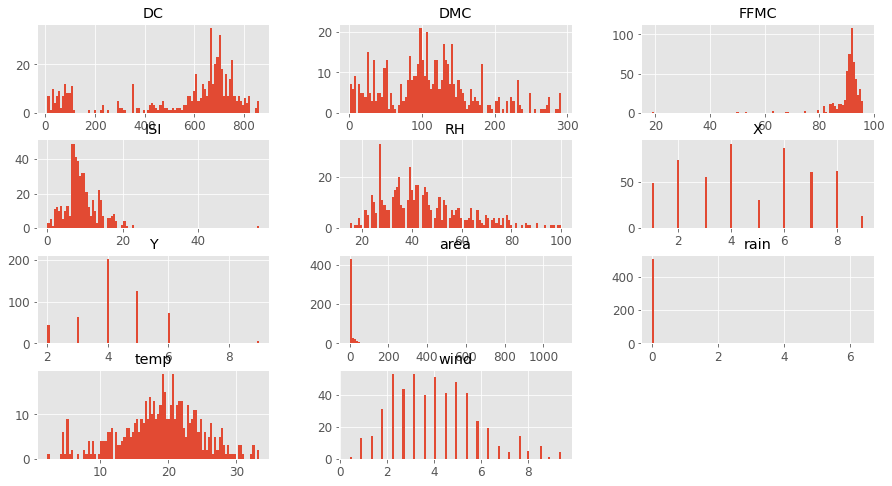

In [16]:
# Visualize histogram of dataset
dataset.hist(figsize= (15,8), bins= 100)
plt.show()

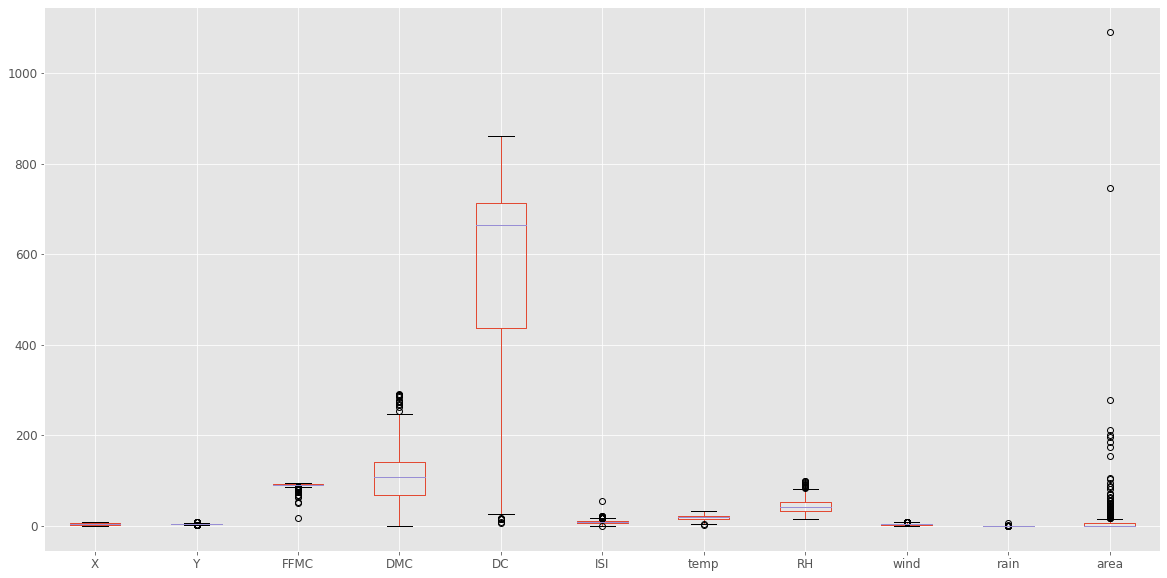

In [17]:
# the histograms show some skewness in the dataset for the following columns; DC, DMC,FFMC,Y,area, wind,rain.
# However, we will study this later quantitatively
# Boxplot of dataframe
dataset.boxplot(figsize= (20,10))
plt.show()

In [18]:
# Once again, we note outliers in a couple of columns and most notably in FFMC, DMC,area

The skewness of the target variable is: 12.846933533934868
The kurtosis of the target variable is: 194.1407210942299


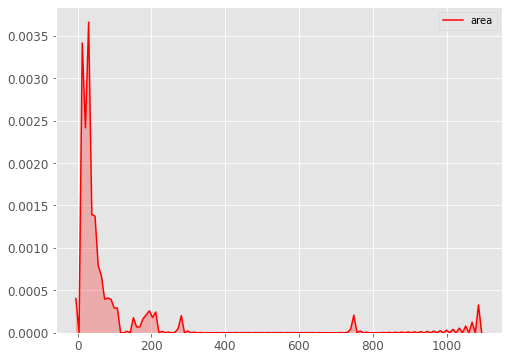

In [19]:
# Statistical analysis on target variable (area)
print("The skewness of the target variable is:", dataset['area'].skew())
print("The kurtosis of the target variable is:", dataset['area'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['area'], shade=True, color="r")
plt.show()

##### The high value of skewness implies the distribution is highly skewed. Specifically, the positive value implies poistively skewed distribution. The large kurtosis value indicates heavy tails/outliers. It is therfore important to transform the target variable to address the skewness. In addition address the large kurtosis value.

Text(0.5, 1.0, 'Area bins')

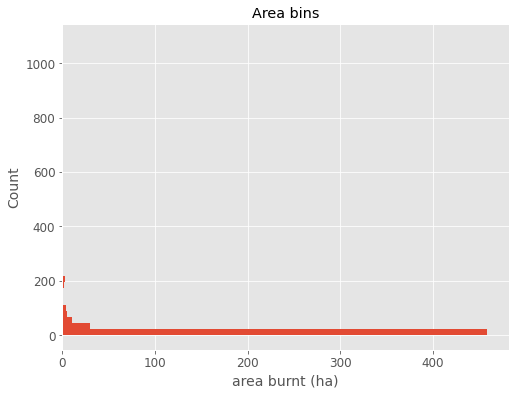

In [20]:
# Let us transform the area column into four categories: ( low, moderate and high damage)
plt.figure(figsize= (8,6))
plt.hist(dataset['area'], orientation='horizontal', bins = 50 )
plt.xlabel("area burnt (ha)")
plt.ylabel("Count")
plt.title("Area bins")

In [21]:
# Create bins
bins = np.linspace( min(dataset['area']), max(dataset['area']), 5)
area_cat = ['Very Low', 'Moderatly Low','Medium', 'High']

dataset['area_binned'] = pd.cut(dataset['area'], bins, labels = area_cat, include_lowest= True)

dataset.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_binned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,Very Low
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,Very Low
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,Very Low
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,Very Low
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,Very Low
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,Very Low
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,Very Low
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,Very Low
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,Very Low
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,Very Low


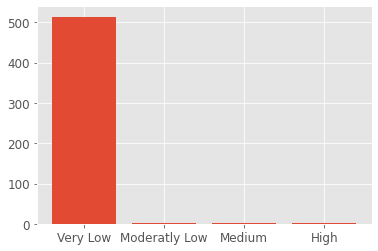

In [22]:
# Visualize the above category
plt.bar(area_cat, dataset['area_binned'].value_counts())
plt.show()

In [23]:
# Display categories and counts for created category
dataset['area_binned'].value_counts()


Very Low         514
High               1
Medium             1
Moderatly Low      1
Name: area_binned, dtype: int64

In [24]:
# create new datframe for month category
months_fire_counts = dataset['month'].value_counts().to_frame()
months_fire_counts.rename(columns=  {'month': 'value_counts'}, inplace = True)

months_fire_counts.index.name = 'months'

months_fire_counts.head()

,value_counts
months,
aug,184
sep,172
mar,54
jul,32
feb,20


In [25]:
# Lets analyze how month and days affect forest fires
df_test = dataset[['day', 'month', 'area']]
df_grp = df_test.groupby(['day','month'], as_index = False).mean()
df_grp

,day,month,area
0,fri,apr,0.000000
1,fri,aug,5.600476
2,fri,dec,9.270000
3,fri,feb,5.772000
4,fri,jul,13.220000
...,...,...,...
59,wed,jul,2.576667
60,wed,jun,2.720000
61,wed,mar,1.387500
62,wed,oct,6.850000


In [26]:
# Since this is difficult to interpret we present the result in a pivoy table
df_pivot = df_grp.pivot( index= 'day', columns= 'month')
df_pivot

area                              ...                                  
month        apr        aug     dec      feb  ...    may  nov        oct        sep
day                                           ...                                  
fri     0.000000   5.600476   9.270   5.7720  ...  38.48  NaN   0.000000   5.298158
mon     3.350000   1.187333  15.095   3.3200  ...    NaN  NaN  15.410000   5.922500
sat     0.000000  14.054138     NaN   1.7100  ...   0.00  NaN   8.076667  61.804400
sun    20.376667   9.866500   8.980  17.8025  ...    NaN  NaN   0.000000  14.010741
thu     7.770000  32.198846   5.380   0.0000  ...    NaN  NaN        NaN   5.356190
tue          NaN   6.228571  24.770   3.7650  ...    NaN  0.0   0.000000  26.352105
wed     0.000000  13.950800  11.190   1.1000  ...    NaN  NaN   6.850000  13.028571

[7 rows x 12 columns]

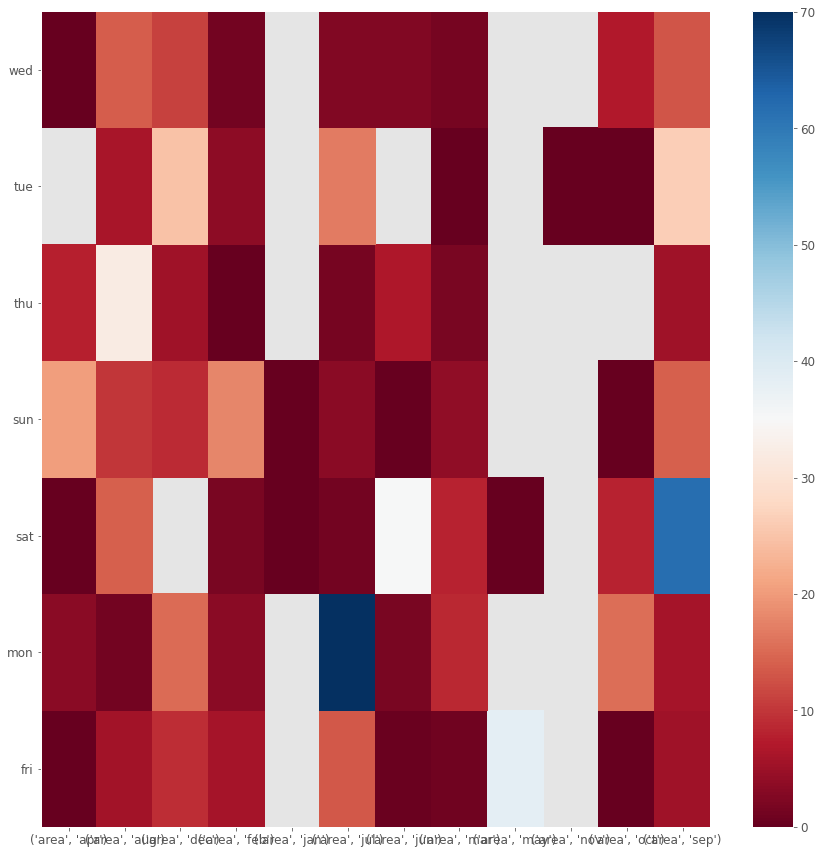

In [27]:
# Present result in the form of a heat map
plt.figure(figsize=(15,15))
plt.pcolor(df_pivot, cmap= 'RdBu')
plt.colorbar()
plt.yticks(np.arange(0.5, len(df_pivot.index), 1), df_pivot.index)
plt.xticks(np.arange(0.5, len(df_pivot.columns), 1), df_pivot.columns)
plt.show()

In [28]:
# Checking for outliers in the target variable
data_outliers = dataset[abs(zscore(dataset['area'])>=3)]
data_outliers


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_binned
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,Very Low
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,High
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,Medium
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,Moderatly Low


In [29]:
# There are four points that are outliers in the area column
# Let us drop these entries and we recheck for outliers
print(" Shape of original dataframe is: ", dataset.shape)
dataset.drop([237,238,415,479], inplace= True)
print(" Shape of new dataframe is: ", dataset.shape)

 Shape of original dataframe is:  (517, 14)
 Shape of new dataframe is:  (513, 14)


In [30]:
dataset['area'].skew()

5.323733714803447

In [31]:
dataset['area'].value_counts()

0.00     247
1.94       3
0.68       2
9.27       2
6.43       2
        ... 
0.79       1
4.41       1
7.02       1
0.71       1
14.57      1
Name: area, Length: 247, dtype: int64

In [35]:
#Grouping the the burnt area to get a better understanding
#dataset['area_cat'] = pd.cut(dataset['area'], bins=[0, 10, 50, 100, 1100], include_lowest=True, labels=['very low area', ' low area', 'medium area', 'large'])
#Grouping the the burnt area to get a better understanding
#dataset['area_cat'] = pd.cut(dataset['area'], bins=[0,5, 10, 50, 100, 1100], include_lowest=True, labels=['0-5', '5-10', '10-50', '50-100', '>100'])

#dataset.area_cat.value_counts()

In [36]:
dataset.shape

(513, 14)

In [37]:
#Interquartile range
Q1 = dataset.area.quantile(.25)
Q3 = dataset.area.quantile(.75)
IQR = 1.5*(Q3-Q1)
IQR

9.645

In [39]:
#we are loosing quite a number of data points in already a small data set if we remove all outliers
dataset.query('(@Q1 - 1.5 * @IQR) <= area <= (@Q3 + 1.5 * @IQR)').area_binned.value_counts(sort=False)

Very Low         459
Moderatly Low      0
Medium             0
High               0
Name: area_binned, dtype: int64

In [40]:
print(dataset['area'].skew())
print(dataset['area'].kurtosis())

5.323733714803447
34.459324300305994


In [ ]:
# Checking for outliers in the target variable
data_outliers2 = dataset[abs(zscore(dataset['FFMC'])>=3)]
data_outliers2

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_cat


##### Results shows we have four points which are outliers. How would we address these points?

In [41]:
## Remove target varaible from original dataframe
target = 'area'
dataset_a = dataset.drop(columns = target)
dataset_a.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area_binned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,Very Low
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,Very Low
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,Very Low
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,Very Low
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,Very Low


In [42]:
#  Finding numerical and categorical columns from original dataframe
num_cols = dataset_a.select_dtypes(exclude ='object').columns.tolist()
cat_cols = dataset_a.select_dtypes(include='object').columns.tolist()

print(num_cols)
print(cat_cols)

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area_binned']
['month', 'day']


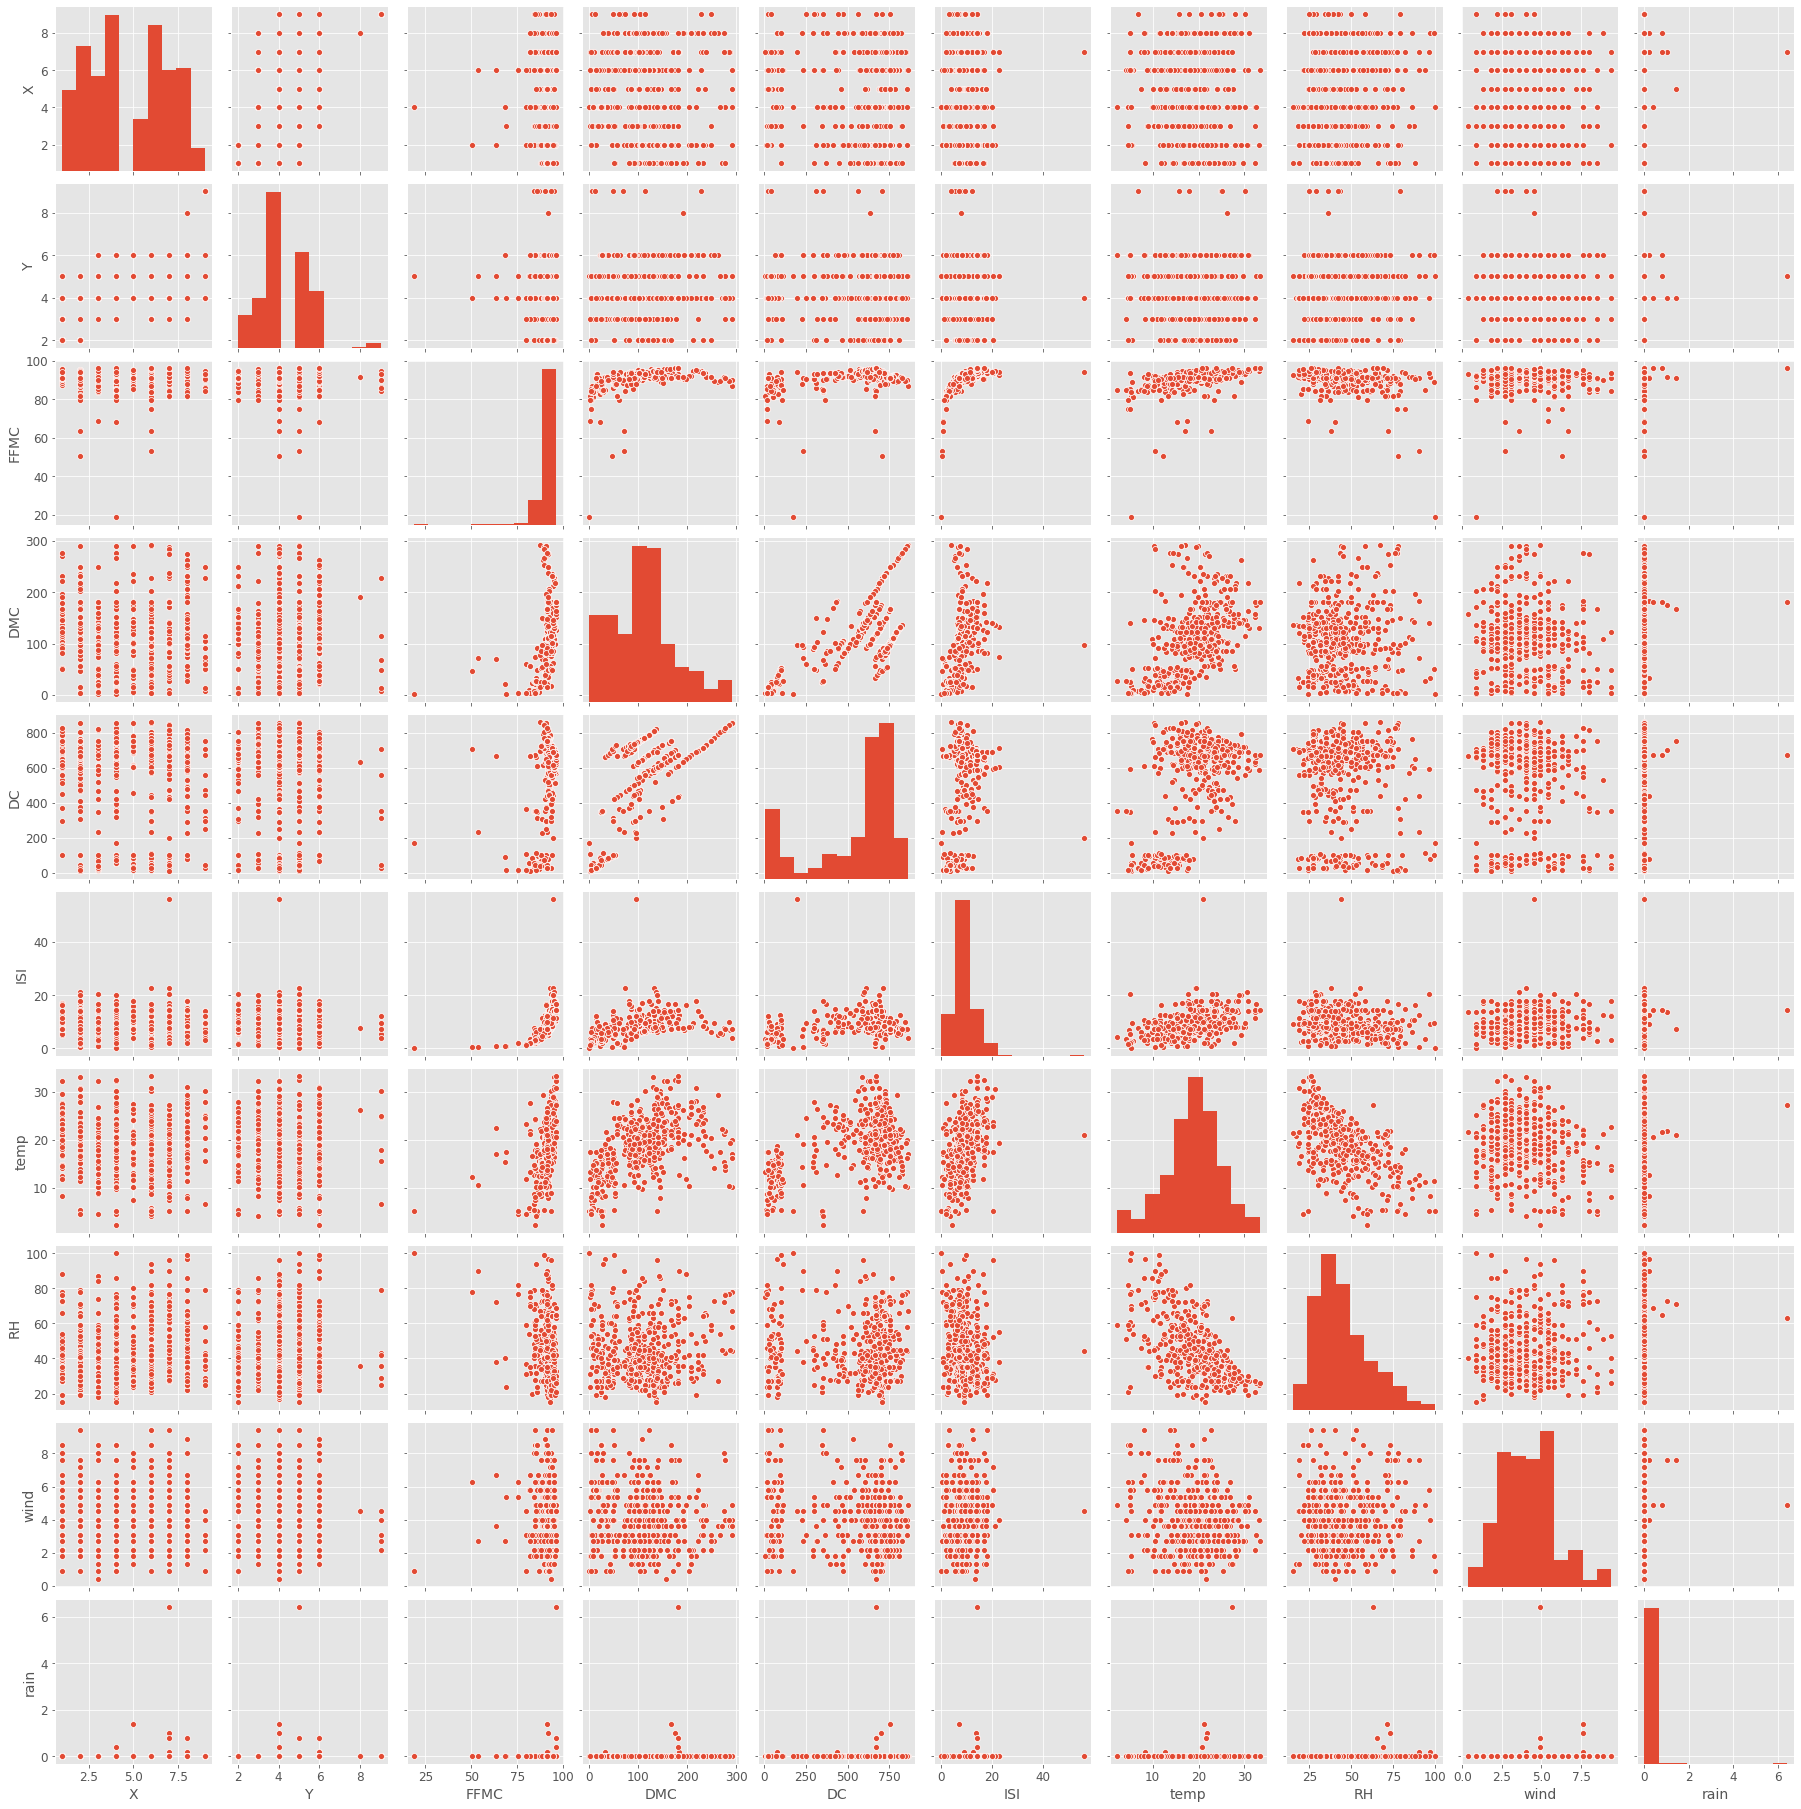

In [43]:
# pairplot on numerical variables
sns.pairplot(dataset_a[num_cols])
plt.show()

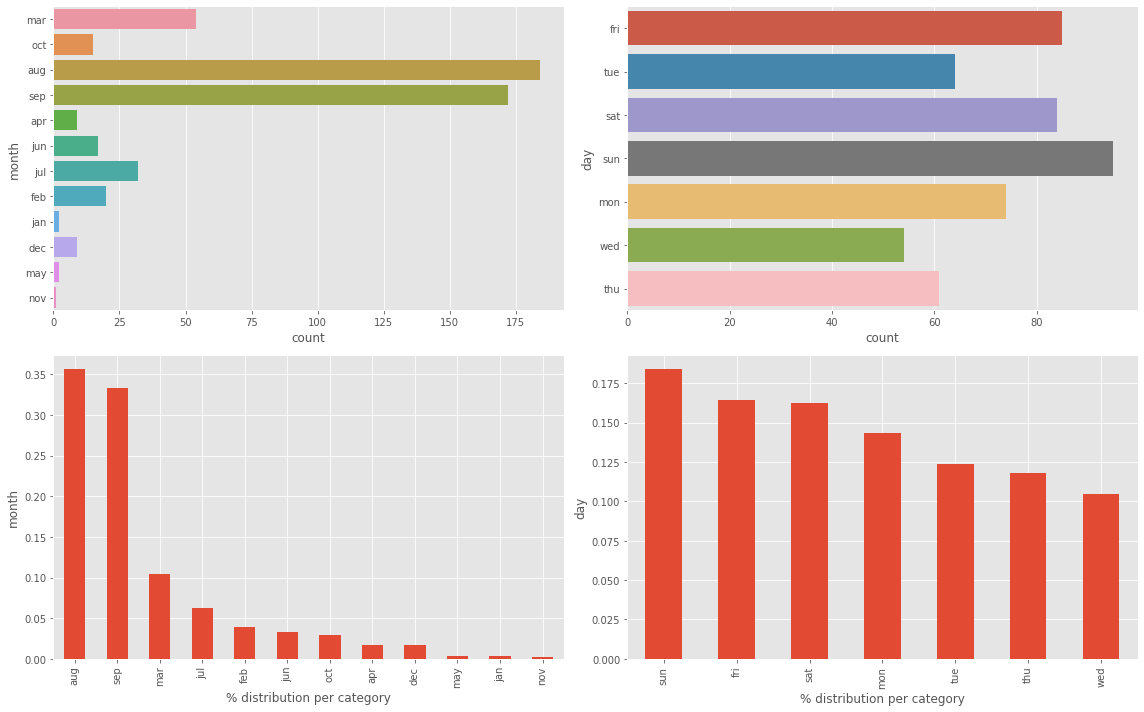

In [ ]:
# Visual exploratory analysis on categorical columns
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dataset_a,y=col)
    plt.subplot(2,2,i+len(cat_cols))
    dataset_a[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

#### It is interesting to see that abnormally high number of the forest fires occur in the month of August and September. In addition, there seems to be an occurence of more fires between Friday to Monday as compared to Tuesday to Thursday.

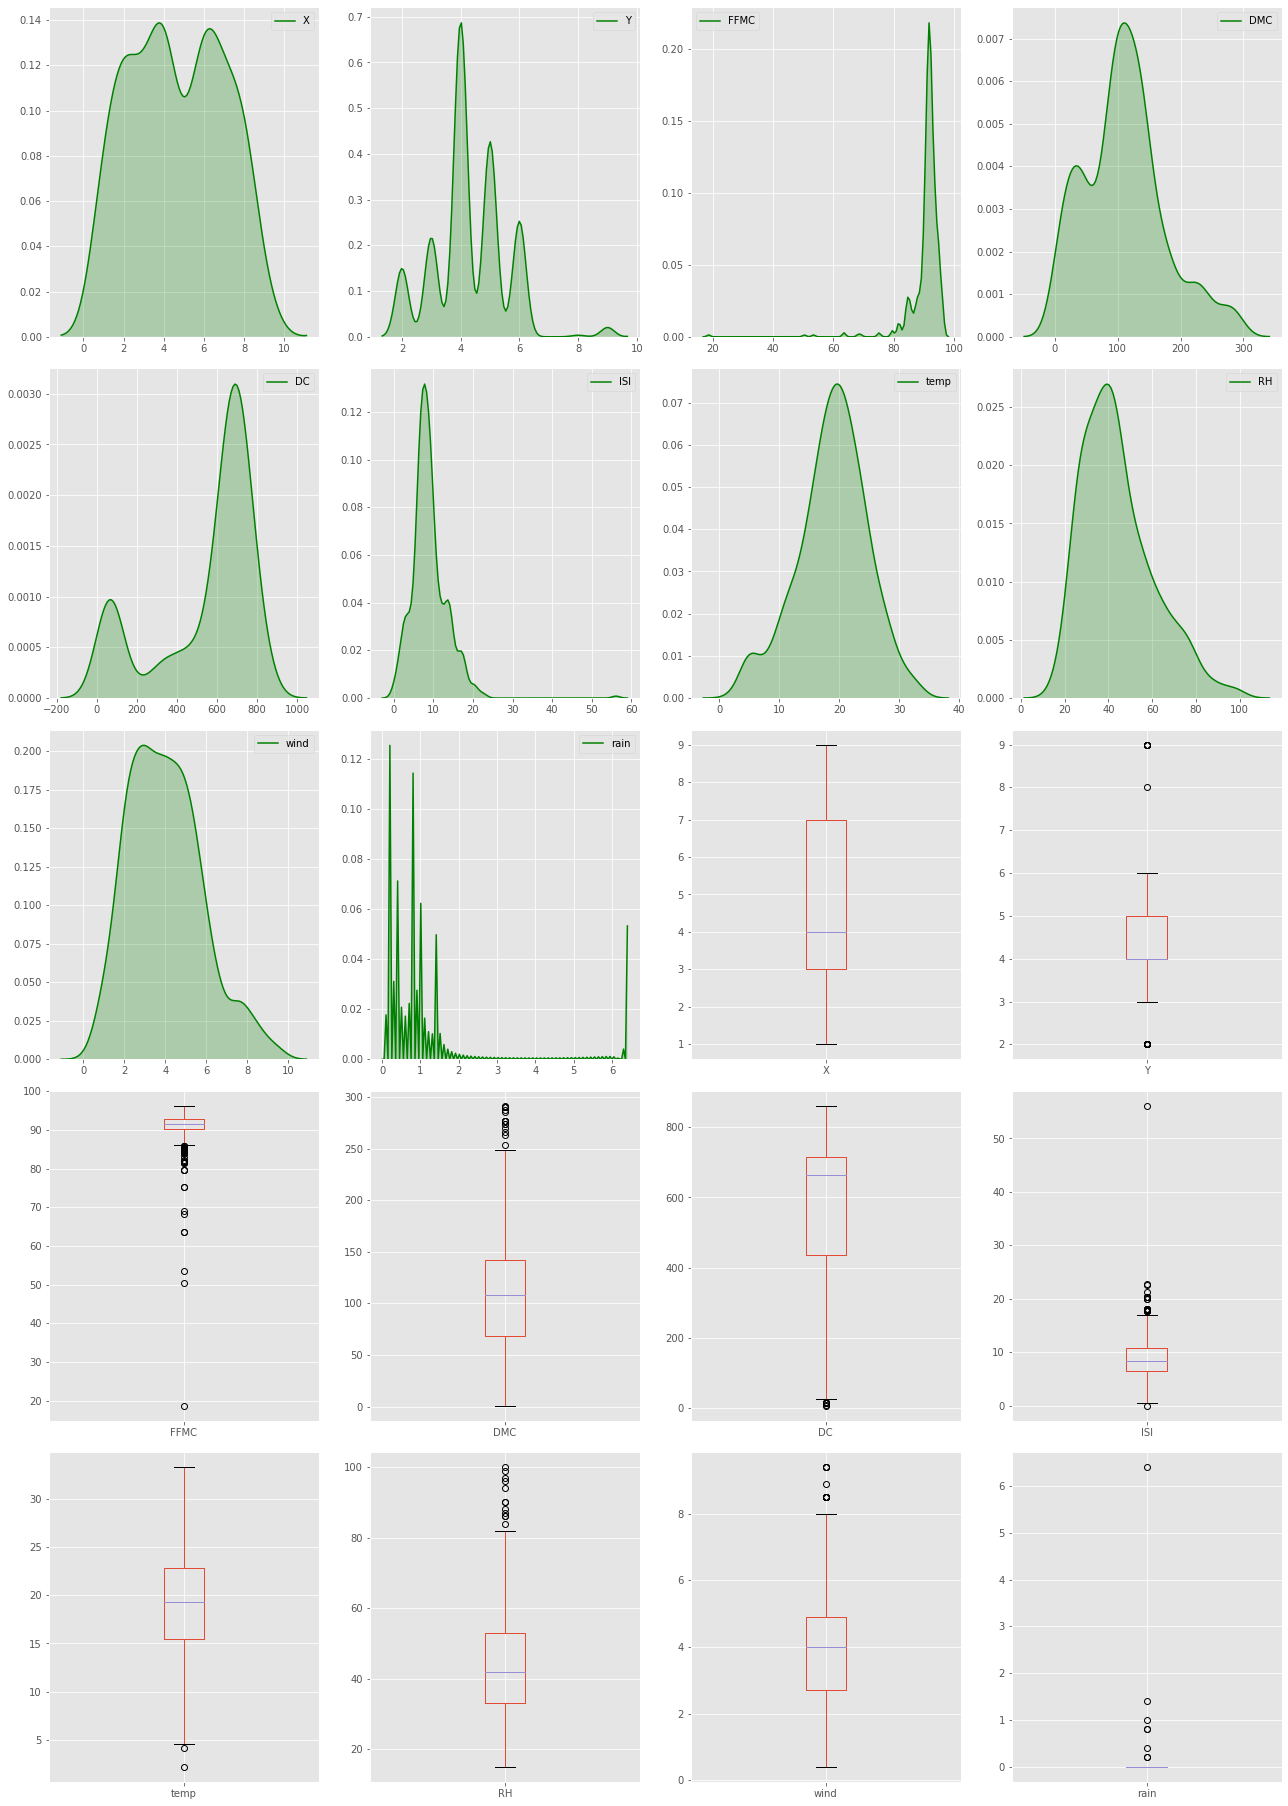

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [ ]:
# Visual exploration of numerical colums
plt.figure(figsize= (18,40))
for i,col in enumerate(num_cols,1):
    plt.subplot(8,4,i)
    sns.kdeplot(dataset_a[col],color='g',shade=True)
    plt.subplot(8,4,i+len(num_cols))
    dataset_a[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = dataset_a[num_cols]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

#####  Outliers, Skewness and kurtosis (high positive or negative) was observed in FFMC, ISI and rain columns.

In [46]:
# a categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

dataset['damage_category'] = dataset['area'].apply(area_cat)
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_binned,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,Very Low,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,Very Low,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,Very Low,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,Very Low,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,Very Low,No damage


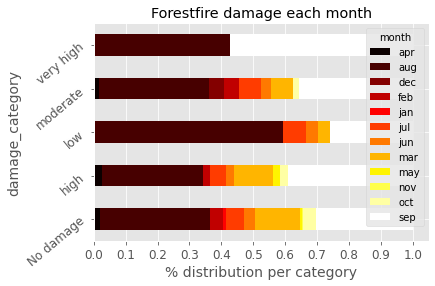

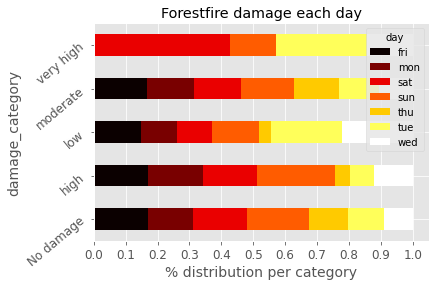

In [47]:
for col in cat_cols:
    cross = pd.crosstab(index=dataset['damage_category'],columns=dataset[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
plt.show()

###### Outliers, Skewness and kurtosis (high positive or negative) was observed in FFMC, ISI and rain columns.In order to minimize the effect of outliers in our model we will transform the above features.


In [48]:
dataset.drop(columns= ['damage_category'], axis = 1, inplace = True)
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_binned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,Very Low
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,Very Low
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,Very Low
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,Very Low
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,Very Low


In [49]:
# Addressing columns with outliers
out_cols = ['area','FFMC','ISI', 'rain']

dataset[out_cols].describe().T



,count,mean,std,min,25%,50%,75%,max
area,513.0,8.408421,22.970960,0.0,0.0,0.47,6.43,200.94
FFMC,513.0,90.635088,5.537583,18.7,90.2,91.60,92.90,96.20
ISI,513.0,9.022027,4.569793,0.0,6.5,8.40,10.80,56.10
rain,513.0,0.021832,0.297107,0.0,0.0,0.00,0.00,6.40


In [50]:
# Using the log transformation check for skewness
(dataset[out_cols]).skew()

area     5.323734
FFMC    -6.560298
ISI      2.536862
rain    19.739515
dtype: float64

In [ ]:
# FFMC and rain are still having high skew and kurtosis values and acknowledging that Linear regression models cannot operate with such high values
# we thus choose to remove these points as outliers using the z-score criterion

mask = dataset.loc[:,['FFMC']].apply(zscore).abs() < 3

# Since most of the values in rain are 0.0, we can convert it as a categorical column
dataset['rain'] = dataset['rain'].apply(lambda x: int(x > 0.0))

dataset[mask.values]
dataset.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
out_cols.remove('rain')
dataset[out_cols] = np.log1p(dataset[out_cols])




In [ ]:
dataset[out_cols].skew()

area     1.217838
FFMC   -11.675394
ISI     -0.937218
dtype: float64

In [ ]:
dataset[out_cols].kurtosis()

area      0.945668
FFMC    185.482383
ISI       2.584588
dtype: float64

In [ ]:
# Checking for outliers in the target variable
data_outliers = dataset[abs(zscore(dataset['FFMC'])>=3)]
data_outliers

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep


In [ ]:
# Split dataframe into X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X.shape)
print(y.shape)
print("The total number of rows in the feature X dataset is" + " " +  str(X.shape[0]))
print("The total number of attributes in X is" + " " +  str(X.shape[1]))
print("The total number of observations in y is" + " " + str(X.shape[1]))

(517, 12)
(517,)
The total number of rows in the feature X dataset is 517
The total number of attributes in X is 12
The total number of observations in y is 12


In [ ]:
# print first few rows of X
print(X[0:3,:])

[[7 5 'mar' 'fri' 86.2 26.2 94.3 5.1 8.2 51 6.7 0.0]
 [7 4 'oct' 'tue' 90.6 35.4 669.1 6.7 18.0 33 0.9 0.0]
 [7 4 'oct' 'sat' 90.6 43.7 686.9 6.7 14.6 33 1.3 0.0]]


In [ ]:
# print first few rows of y
print(y[0:5])

[0. 0. 0. 0. 0.]


In [ ]:
# Taking care of categorical data in X (i.e. Encoding the Independent Variable)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2, 3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[0:3])
print("The new shape of feature matrix X after encoding is ",  X.shape)

[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
  0.0 7 5 86.2 26.2 94.3 5.1 8.2 51 6.7 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
  0.0 7 4 90.6 35.4 669.1 6.7 18.0 33 0.9 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 7 4 90.6 43.7 686.9 6.7 14.6 33 1.3 0.0]]
The new shape of feature matrix X after encoding is  (517, 29)


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(413, 29)
(104, 29)
(413,)
(104,)


## Model 1: Multiple Linear Regression

In [ ]:
# Train Model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("	The coefficient of determination R^2 of the prediction.:", regressor.score(X_train,y_train))

	The coefficient of determination R^2 of the prediction.: 0.05293535775223334


In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-7.93e-01  5.20e-01]
 [ 1.82e+01  0.00e+00]
 [-1.78e+00  0.00e+00]
 [ 1.08e+01  3.59e+01]
 [ 1.15e+01  3.77e+01]
 [ 1.21e+01  0.00e+00]
 [ 2.74e+01  1.69e+00]
 [ 6.34e+00  0.00e+00]
 [ 2.22e+00  0.00e+00]
 [ 5.05e+01  3.95e+00]
 [ 2.04e+01  0.00e+00]
 [ 1.79e+01  0.00e+00]
 [ 3.96e+00  1.10e+00]
 [ 5.36e+00  0.00e+00]
 [ 3.95e+01  0.00e+00]
 [ 1.28e+01  0.00e+00]
 [ 1.72e+01  0.00e+00]
 [ 5.90e+00  7.31e+00]
 [ 3.10e+00  6.44e+00]
 [-6.68e+00  3.19e+00]
 [ 3.62e+01  1.11e+01]
 [-9.67e+00  0.00e+00]
 [-3.21e+00  3.71e+00]
 [ 1.93e+01  3.20e+00]
 [ 9.38e+00  0.00e+00]
 [ 1.58e+01  0.00e+00]
 [ 2.03e+01  0.00e+00]
 [ 2.65e+01  7.80e+00]
 [ 3.01e+00  0.00e+00]
 [ 1.90e+01  3.70e+01]
 [ 1.47e+01  9.96e+00]
 [ 6.65e+00  0.00e+00]
 [ 1.12e+01  0.00e+00]
 [ 1.66e+01  7.04e+00]
 [ 2.71e+01  1.03e+02]
 [ 1.81e+01  7.30e+00]
 [ 5.81e+00  1.58e+00]
 [ 2.91e+01  1.94e+00]
 [ 8.12e-01  8.71e+00]
 [ 1.09e+01  9.00e-02]
 [ 1.12e+01  2.46e+01]
 [-7.79e+00  0.00e+00]
 [ 3.00e+01  4.85e+01]
 [-7.09e+00

In [ ]:
# Evaluate accuracy of model for training set
from sklearn.metrics import r2_score
print("The r2_score for linear regression model is:", r2_score(y_pred,y_test))

The r2_score for linear regression model is: -36.9466077018298


##### Evaluating the fit of the model on the training set, we can clearly note that the model is bias (i.e. it fits the training set poorly). Therefore, it is not surprising to observe the poor result from the test set.

## Model 2: Polynomial Regression

In [ ]:
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
print("The coefficient of determination R^2 of the prediction:",lin_reg_2.score(X_poly, y_train))

The coefficient of determination R^2 of the prediction: 0.9998871774268282


In [ ]:
# Predicting the Test set results
y_pred = lin_reg_2.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.48e+03  5.20e-01]
 [ 1.66e+02  0.00e+00]
 [ 1.20e+03  0.00e+00]
 [-5.69e+02  3.59e+01]
 [ 3.24e+02  3.77e+01]
 [-6.97e+03  0.00e+00]
 [ 5.28e-10  1.69e+00]
 [-1.89e+03  0.00e+00]
 [ 5.03e+03  0.00e+00]
 [-4.37e+03  3.95e+00]
 [-4.62e+02  0.00e+00]
 [ 3.52e+02  0.00e+00]
 [ 7.21e+02  1.10e+00]
 [ 1.87e+02  0.00e+00]
 [ 1.39e+02  0.00e+00]
 [-4.27e+01  0.00e+00]
 [-2.98e+02  0.00e+00]
 [ 6.76e+01  7.31e+00]
 [-1.50e+03  6.44e+00]
 [ 1.48e+03  3.19e+00]
 [ 1.70e+02  1.11e+01]
 [-4.42e+02  0.00e+00]
 [ 3.80e-10  3.71e+00]
 [-4.35e+02  3.20e+00]
 [-4.21e+02  0.00e+00]
 [ 4.59e+02  0.00e+00]
 [ 1.38e+02  0.00e+00]
 [-4.72e+02  7.80e+00]
 [ 1.45e+01  0.00e+00]
 [-1.19e+04  3.70e+01]
 [ 8.82e+02  9.96e+00]
 [-1.77e+03  0.00e+00]
 [ 4.98e+01  0.00e+00]
 [-2.82e+02  7.04e+00]
 [-8.43e+00  1.03e+02]
 [-1.21e+02  7.30e+00]
 [-3.01e+02  1.58e+00]
 [-1.36e+02  1.94e+00]
 [ 1.00e+01  8.71e+00]
 [ 8.84e+01  9.00e-02]
 [-3.05e+02  2.46e+01]
 [-9.50e+02  0.00e+00]
 [-1.24e+02  4.85e+01]
 [ 4.51e+02

In [ ]:
# Evaluate accuracy of model for test set
from sklearn.metrics import r2_score
print("The r2_score for polynomial regression model of degree 3  is:", r2_score(y_pred,y_test))

The r2_score for polynomial regression model of degree 3  is: -0.023646537072645524


##### Evaluating the fit of the model on the training set, we can clearly note that the model fits well with the trianing data; however, the test set accuracy indicates the model does not genarluze well to untrained data. In fact, the negative value for R squared indicates an arbitarirly worse model. 

## Model 3: Decision Tree Regression

In [ ]:
# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
print("	The coefficient of determination R^2 of the prediction.:", regressor.score(X_train,y_train))

	The coefficient of determination R^2 of the prediction.: 0.9998871774268282


In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3.09e+00 5.20e-01]
 [3.50e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 3.59e+01]
 [4.88e+00 3.77e+01]
 [2.21e+00 0.00e+00]
 [0.00e+00 1.69e+00]
 [0.00e+00 0.00e+00]
 [1.96e+02 0.00e+00]
 [0.00e+00 3.95e+00]
 [1.22e+01 0.00e+00]
 [2.74e+01 0.00e+00]
 [3.35e+00 1.10e+00]
 [8.68e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [2.13e+00 0.00e+00]
 [3.44e+01 0.00e+00]
 [1.75e+00 7.31e+00]
 [0.00e+00 6.44e+00]
 [7.50e-01 3.19e+00]
 [2.21e+00 1.11e+01]
 [7.50e-01 0.00e+00]
 [0.00e+00 3.71e+00]
 [2.44e+00 3.20e+00]
 [4.41e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [1.46e+01 0.00e+00]
 [0.00e+00 7.80e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 3.70e+01]
 [0.00e+00 9.96e+00]
 [7.02e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 7.04e+00]
 [5.97e+00 1.03e+02]
 [1.15e+01 7.30e+00]
 [1.47e+00 1.58e+00]
 [2.60e+01 1.94e+00]
 [1.00e+01 8.71e+00]
 [2.44e+00 9.00e-02]
 [4.95e+00 2.46e+01]
 [0.00e+00 0.00e+00]
 [2.57e+00 4.85e+01]
 [0.00e+00 2.47e+00]
 [8.02e+00 3.32e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 4.67e+01]
 [7.40e+00 1.

In [ ]:
# Evaluate accuracy of model for test set
from sklearn.metrics import r2_score
print("The r2_score for decison tree regression model is:", r2_score(y_pred,y_test))

The r2_score for decison tree regression model is: -12.731453460711872


##### Evaluating the fit of the model on the training set, we can clearly note that the model fits well with the trianing data; however, the test set accuracy indicates the model does not genarluze well to untrained data. In fact, the negative value for R squared indicates an arbitarirly worse model. It is clear that something special needs to be done to improve the model from fitting with untrained data.

## Model 4: Multiple Linear Regression but with log transformation on target variable

In [ ]:
# Examine X dataset
print(X)
print(X.shape)


[[0.0 0.0 0.0 ... 51 6.7 0.0]
 [0.0 0.0 0.0 ... 33 0.9 0.0]
 [0.0 0.0 0.0 ... 33 1.3 0.0]
 ...
 [0.0 1.0 0.0 ... 70 6.7 0.0]
 [0.0 1.0 0.0 ... 42 4.0 0.0]
 [0.0 0.0 0.0 ... 31 4.5 0.0]]
(517, 29)


(517,)


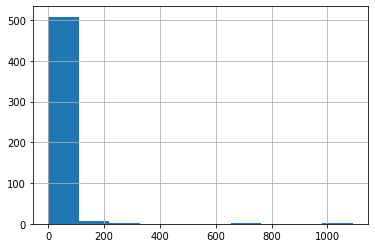

In [ ]:
# Examine and plot the  target variable y
print(y.shape)
dataset["area"].hist()
plt.show()

In [ ]:
# Transform the y varaible using a log transformation
y_trans = np.log2(y)
dataset["area_trans"] = y_trans
dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_trans
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,-inf
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,-inf
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,-inf
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,-inf
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,-inf


In [ ]:
# Examine and plot the transformed target variable y
dataset["area_trans"].hist()
plt.show()

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Train Model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("	The coefficient of determination R^2 of the prediction.:", regressor.score(X_train,y_train))

## Model 5: Multiple Linear Regression

## Model 6: Multiple Linear Regression